### **House Price Prediction**
- **Pon Ajith Kumar P**
- **Machine Learning Task 1**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer

In [91]:
# Load dataset
file_path = "housing.csv"
df = pd.read_csv(file_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [93]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [94]:
# Fill missing values with median and mode
for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        df[col] = df[col].fillna(df[col].median())  # Use median for numerical columns
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # Use mode for categorical columns
print("Missing Values filled successfully")

Missing Values filled successfully


In [95]:
# Convert categorical binary columns ('yes'/'no') to numerical (0/1)
categorical_binary = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in categorical_binary:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df["price"] = np.log1p(df["price"])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,16.321037,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,16.321037,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414348,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,14.384879,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,14.375127,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,14.375127,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [96]:
# Define features and target
X = df.drop(columns=["price"])
y = df["price"]

In [97]:
# Column transformer for One-Hot Encoding
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(drop='first', sparse_output=False), ['furnishingstatus'])], remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)

In [98]:
# Scale independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [99]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [100]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
print("Model Trained Successfully")

Model Trained Successfully


In [102]:
# Predict house prices and convert predictions back from log scale
y_pred = model.predict(X_test)
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

In [103]:
# Compute performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"\n📊 Model Performance Metrics:")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 R² Score: {r2:.2f}")


📊 Model Performance Metrics:
📌 Mean Squared Error (MSE): 1728299877704.57
📌 Root Mean Squared Error (RMSE): 1314648.20
📌 Mean Absolute Error (MAE): 960123.17
📌 R² Score: 0.66


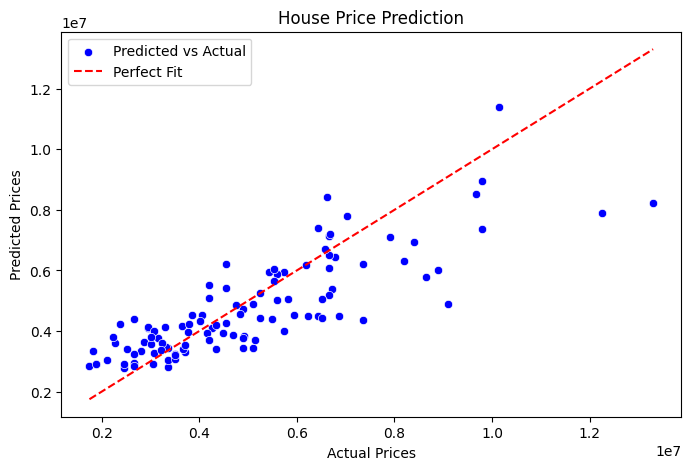

In [104]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], '--r', label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("House Price Prediction")
plt.show()

In [105]:
# Generate a realistic random house
random_features = {
    "area": np.random.randint(1000, 5000),
    "bedrooms": np.random.randint(1, 5),
    "bathrooms": np.random.randint(1, 4),
    "stories": np.random.randint(1, 4),
    "mainroad": np.random.randint(0, 2),
    "guestroom": np.random.randint(0, 2),
    "basement": np.random.randint(0, 2),
    "hotwaterheating": np.random.randint(0, 2),
    "airconditioning": np.random.randint(0, 2),
    "parking": np.random.randint(0, 3),
    "prefarea": np.random.randint(0, 2),
    "furnishingstatus": np.random.choice(["furnished", "semi-furnished", "unfurnished"]),
}
random_features

{'area': 4106,
 'bedrooms': 3,
 'bathrooms': 3,
 'stories': 2,
 'mainroad': 1,
 'guestroom': 0,
 'basement': 0,
 'hotwaterheating': 0,
 'airconditioning': 1,
 'parking': 0,
 'prefarea': 1,
 'furnishingstatus': np.str_('furnished')}

In [106]:
# Convert input to DataFrame
input_data = pd.DataFrame([random_features])

In [107]:
# Apply transformations
input_data_transformed = column_transformer.transform(input_data)
input_data_scaled = scaler.transform(input_data_transformed)
input_data_scaled

array([[-0.84488844, -0.6964292 , -0.48176634,  0.04727831,  3.41381019,
         0.22441013,  0.40562287, -0.46531479, -0.73453933, -0.2192645 ,
         1.4726183 , -0.80574124,  1.80494113]])

In [108]:
# Predict price
predicted_price_log = model.predict(input_data_scaled)
predicted_price_actual = np.expm1(predicted_price_log)[0]
predicted_price_actual

np.float64(7076193.931324544)

In [109]:
print("Random House Features")
for key, value in random_features.items():
    print(f"   {key}: {value}")

Random House Features
   area: 4106
   bedrooms: 3
   bathrooms: 3
   stories: 2
   mainroad: 1
   guestroom: 0
   basement: 0
   hotwaterheating: 0
   airconditioning: 1
   parking: 0
   prefarea: 1
   furnishingstatus: furnished


In [110]:
print("\nPredicted House Price")
print(f"   ₹ {predicted_price_actual:,.2f}")  


Predicted House Price
   ₹ 7,076,193.93


In [111]:
print("Task 1 Completed")

Task 1 Completed
